# The Most Environmentally Friendly Neighborhood

By: Ruchi Hegde, Dailynn, Le Lin

#### Combined Metric

The combined metric is integrating the ratio of our datasets of fire incidents, the amount of smart trash cans, and the area cleaned by beautify the burgh per acre of neighborhood to determine which neighborhood is the most environmentally friendly. 

<img src="https://media.giphy.com/media/dCfkMzIDsoXrAbcwXV/giphy.gif" width="450" align="center">

### Read in .CSV files

In [35]:
# imported in necessary libraries and read .csv files that I used throughout the whole program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
cans = pd.read_csv('PittsburghSmartTrash.csv')
neighborhood = pd.read_csv('neighborhoods.csv')
fire = pd.read_csv('FireIncidents.csv')

## Neighborhood Acreage

### Use the neighborhood dataset to find the area in acres of each neighborhood
Note: We are importing the neighborhood and acreage to determine a ratio between our three datasets and the area of the neighborhood. This is useful because just having each separate dataset is good, but the numbers can vary depending on the size of the neighborhood. For example, more fires occur in larger neighborhoods. Therefore, if the acreage is taken into account, we can get ratios that we can use to compare each neighborhood, no matter the size.

In [34]:
# uses neighborhoods.csv to make a table with just the neighborhood and acreage of each neighborhood

# created new variable that was just the columns hood and acres from the neighborhoods.csv
sortedareadf = neighborhood[['hood','acres']]
# resetted the index to not be the numbers it was in the original .csv file, just for visualization
newsortedareadf = sortedareadf.reset_index(drop=True)
# printed the table out
newsortedareadf

,hood,acres
0,Chateau,246.501
1,Summer Hill,282.104
2,Northview Heights,201.558
3,Spring Hill-City View,404.765
4,Perry South,581.656
...,...,...
85,Overbrook,539.515
86,Chartiers City,84.954
87,Esplen,147.829
88,Ridgemont,237.059


## Fire Incidents

### Merge fire incidents with acres of each neighborhood to get table that can calculate ratio

In [3]:
# merged fire to neighborhood dataset to calculate ratio

# created column with number of times a neighborhood appeared, named hood and neighborhood
num = fire['neighborhood'].value_counts().to_frame().rename_axis("hood")
# renamed columns to be neighborhood and frequency
num = num.rename(columns = {"neighborhood": "frequency"})
# merged that table with the neighborhood.csv columns hood and acres
num = num.merge(sortedareadf, how = "left", left_on = "hood", right_on="hood")
# printed merged table
num

,hood,frequency,acres
0,Carrick,255,1075.670
1,Squirrel Hill South,226,1717.485
2,Central Business District,225,411.593
3,South Side Flats,220,601.553
4,Hazelwood,213,1017.805
...,...,...,...
86,St. Clair,11,199.285
87,Mt. Oliver,10,66.226
88,East Carnegie,10,277.895
89,Regent Square,7,123.682


## Calculating the ratio

In [4]:
# creating ratio column by dividing the frequency column and acres column
num["ratio"] = num["frequency"] / num["acres"]
# replacing NaN and inf values with 0, so it doesn't skew the data
num = num.replace([np.inf, -np.inf, np.NaN], 0)
# sorting the values from greatest to least by the ratio value
num = num.sort_values("ratio", ascending = False)
# printing out the table num
# we see Lincoln-Lemington-Belmar has most fires, while Hays has the least (not counting Perry North and Mount Oliver Borough)
# Perry North and Mount Oliver Borough don't really count here because both of them had an infinite value, so it was replaced with 0
num

,hood,frequency,acres,ratio
7,Lincoln-Lemington-Belmar,174,180.105,0.966103
20,Marshall-Shadeland,119,148.209,0.802920
14,Knoxville,147,193.982,0.757802
26,East Allegheny,111,151.705,0.731683
8,Homewood South,168,256.093,0.656012
...,...,...,...,...
69,Fairywood,23,622.746,0.036933
88,East Carnegie,10,277.895,0.035985
77,Hays,18,1125.478,0.015993
28,Perry North,100,0.000,0.000000


### Creating Chloropleth map with fire incident ratio

In [5]:
# read in the shape file with geopandas
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") 
# merged the fire incidents table with the ratio values with the shape file
fire_geo = neighborhoods.merge(num, how='left', left_on = "hood", right_on = "hood")
# printed the merged table
fire_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,frequency,acres_y,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",83,180.883,0.458860
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",113,320.679,0.352377
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",55,138.372,0.397479
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",89,166.101,0.535819
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",47,390.864,0.120246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",12,237.059,0.050620
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",18,128.679,0.139883
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",35,139.552,0.250803
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",19,293.197,0.064803


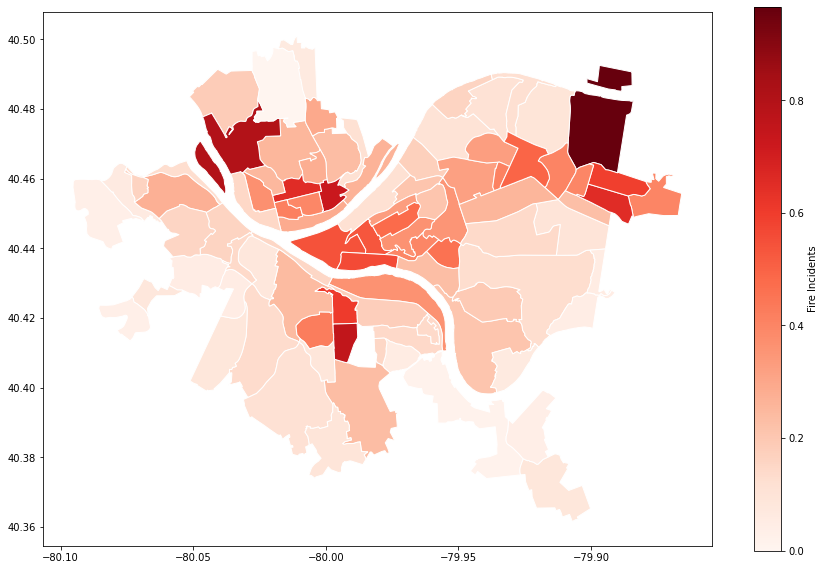

In [6]:
# plotted the merged fire dataset as a chloropleth map
fire_geo.plot(column='ratio', # set the ratio column to be used for coloring
               cmap='Reds',              # chose red because of the color of fire
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               )

This chloropleth map shows which neighborhoods had the most and least fire incidents per acre. The darker the neighborhood, the greater the ratio, the more fire incidents per acre, the least environmentally friendly areas. The graph shows that Lincoln-Lemington-Belmar in the top right corner of Pittsburgh has the most fires, meaning per this metric is it the worst neighborhood. 

## Smart Trash Containers

### Merging smart trash cans with neighborhood area

In [32]:
# this table refers to the smart trash cans 

# created a column in the dataframe which had the neighborhood and frequency(but it is called neighborhood because of the cans column name)
total = cans['neighborhood'].value_counts().to_frame().rename_axis("hood")
# to fix the names, I used the rename function and changed the columns to be called neighborhood and frequency
total = total.rename(columns = {"neighborhood": "frequency"})
# then, I merged the dataframe with the dataframe with only the hood and acreage of each neighborhood
total = total.merge(sortedareadf, how = "left", left_on = "hood", right_on="hood")
# I printed the merged dataframe
total

,hood,frequency,acres
0,Shadyside,77,592.104
1,East Liberty,68,373.650
2,Squirrel Hill South,64,1717.485
3,Bloomfield,59,451.405
4,South Side Flats,56,601.553
...,...,...,...
74,Swisshelm Park,1,308.575
75,Mt. Oliver,1,66.226
76,East Carnegie,1,277.895
77,Northview Heights,1,201.558


### Calculating the ratio of the number of smart trashcans/acres

In [8]:
# calculating ratio column

# created a ratio column and set it equal to frequency over acres
total["ratio"] = total["frequency"] / total["acres"]
# In order to have no disruptions to the data, I replaced the NaN and inf values with 0
total = total.replace([np.inf, -np.inf, np.NaN], 0)
# then, I sorted values by ratio to display it from highest to lowest
total = total.sort_values("ratio", ascending=False)
# I proceeded to print that out
total

,hood,frequency,acres,ratio
5,North Shore,52,195.014,0.266648
7,Central Oakland,39,180.883,0.215609
1,East Liberty,68,373.650,0.181988
34,Friendship,12,68.297,0.175703
14,East Allegheny,26,151.705,0.171385
...,...,...,...,...
73,Windgap,1,266.678,0.003750
76,East Carnegie,1,277.895,0.003598
74,Swisshelm Park,1,308.575,0.003241
68,Banksville,2,622.919,0.003211


### Creating Chloropleth map with cans to acres ratio

In [9]:
# merging cans with shape file to create cans_geo
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

# merged the geopandas shape file with the dataframe with the ratio between frequency of trash cans and acres of neighborhood
cans_geo = neighborhoods.merge(total, how='left')
# printed it out
cans_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,frequency,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",NaN,NaN
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",9.0,0.065042
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",22.0,0.132450
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN,NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",9.0,0.069941
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN,NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN,NaN


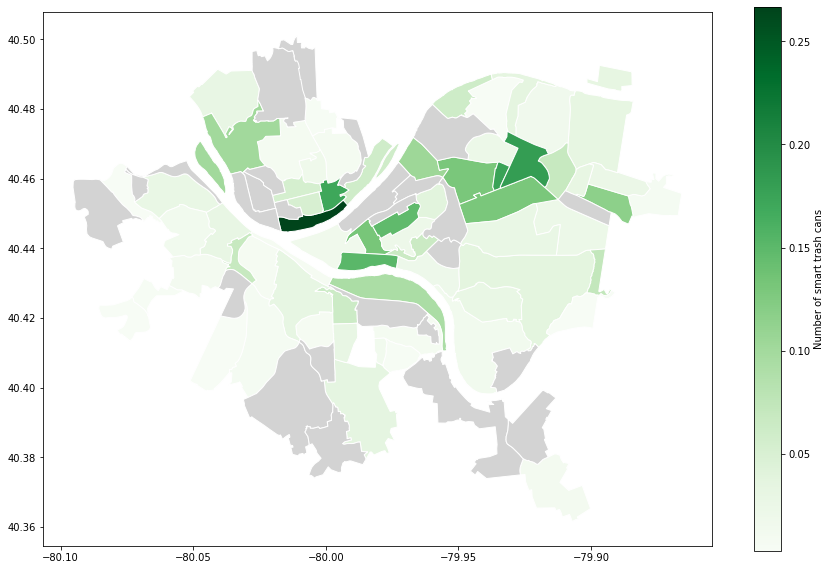

In [10]:
# plotting cans_geo in chloropleth map
cans_geo.plot(column='ratio', # set ratio column to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of smart trash cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

This chloropleth map shows that, per the individual metric, North Shore is the best and Banksville is the worst because the larger the ratio, the more trash cans, the more environmentally friendly. The reason Perry North was not counted as the worst is because it ended with an inf value, so it was automatically put in as 0, so it is not entirely accurate that it is the worst. 

## Beautify The Burgh

### Merging beautified area with neighborhood area data to get a ratio
#### Note: the area data in beautify the burgh data is in meters squared, so we converted to acres in order to keep the ratios consistent with acres.
Another note: We could have used the number of clean up organizations per neighborhood instead of the cleaned up area, but we figured the direct impact of cleaned up area would be a better metric for our combined metric of most environmentally friendly neighborhood.

In [11]:
# merging beautify and neighborhood

# read in beautify csv file
beautify = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
# groups by neighborhood and sums up area cleaned in meters squared
beautify = beautify.groupby('Neighborhood').sum() 
# creating a new column, Beautified Sq Meters, to store the summmed up area cleaned
beautify['Beautified Area Sq Meters'] = beautify['SHAPE_Area'] 
# converting the square meters to acres for ratio 
beautify['Beautified Area Acres'] = beautify['Beautified Area Sq Meters'] / 4046.86
# setting table to have hood as the index 
beautify['hood'] = beautify.index 
# merging the neighborhood csv with the beautify to get the ratio using the acres of each neighborhood
beautify = beautify.merge(neighborhood) 
# creating ratio column and setting it equal to beautified area in acres divided by acres of neighborhood
beautify['ratios'] = beautify['Beautified Area Acres'] / beautify['acres']
# setting beautify table to just have columns hood, Beautified Area Sq Meters, Beautified Area Acres, and ratios 
# deleting the extra columns that are unneeded
beautify = beautify[['hood','Beautified Area Sq Meters','acres','Beautified Area Acres', 'ratios']]
# replacing the NaN and inf values with 0, so that they do not affect the data 
beautify = beautify.replace([np.inf, -np.inf, np.NaN], 0)
# sorting the table by ratio values from highest to lowest
beautify = beautify.sort_values("ratios", ascending = False)
# printing out the table to see it 
beautify

,hood,Beautified Area Sq Meters,acres,Beautified Area Acres,ratios
13,Mount Washington,1.030030e+06,732.495,254.525673,0.347478
6,Central Oakland,2.039578e+05,180.883,50.399034,0.278628
18,South Oakland,2.704829e+05,326.793,66.837712,0.204526
12,Lower Lawrenceville,2.073810e+05,276.392,51.244913,0.185407
22,West Oakland,8.054589e+04,138.372,19.903305,0.143839
14,North Oakland,1.848867e+05,320.679,45.686452,0.142468
21,Strip District,1.632250e+05,390.864,40.333736,0.103191
3,Beltzhoover,9.549008e+04,270.374,23.596091,0.087272
20,Spring Hill-City View,1.241247e+05,404.765,30.671849,0.075777
0,Allegheny West,1.915198e+04,90.841,4.732553,0.052097


### Creating chloropleth map with ratio of beautified area to area of neighborhood
### Starting by import the map files

In [12]:
n = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile with geopandas

beautified_geo = n.merge(beautify, how='left') #merge with beautify dataframe to get table of values
beautified_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,Beautified Area Sq Meters,Beautified Area Acres,ratios
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",NaN,NaN,NaN
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",80545.88713,19.903305,0.143839
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",NaN,NaN,NaN
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN,NaN,NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",NaN,NaN,NaN
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN,NaN,NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN,NaN,NaN


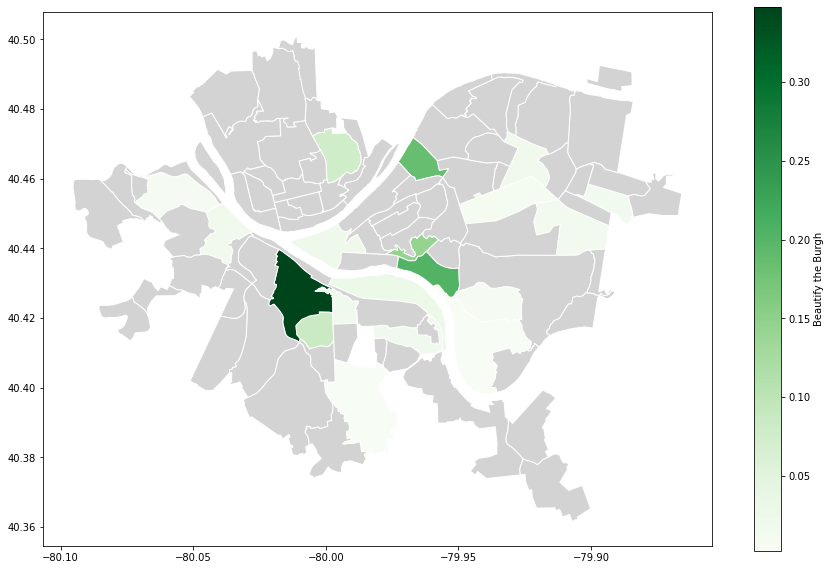

In [13]:
# plot as chloropleth map
beautified_geo.plot(column='ratios', # set the ratios to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Beautify the Burgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

The chloropleth map shows that, in terms of the Beautify the Burgh individual metric, Mount Washington is the best and Hazelwood is the worst when it comes to most Beautify the Burgh area cleaned per acre. In this case, similar to the smart trash cans, the larger the ratio, the better, because that means more area is cleaned per acre. 

Also, notice how many neighborhoods are not colored in. That means many neighborhoods have no data points in the dataset unlike the previous two which had a majority of data points. Just something to keep in mind when it comes to NaN values later on.

## Fire Incidents + Smart Trash Cans Combined

### Merged the fire incident ratio with trash cans ratio to get a merged ratio

In [14]:
# combining both the ratio from the fire incidents and the ratio from the smart trash cans

# merges the total (smart trash cans/acre) with num (fire incidents/acre) to create a merged dataframe
rt = total.merge(num, how='left', left_on='hood', right_on='hood',suffixes=('cans','fire'))
# replacing the NaN and inf values in column ratiofire with 0, so it doesn't impact the data
rt['ratiofire'] = rt['ratiofire'].replace([np.inf, -np.inf, np.NaN], 0)
# creaing new column ratio and equating that to the smart trash can/acre minus fire incident/acre
# the reason it is being subtracted is because the larger the ratio of fire incidents, the worse, so it is the inverse. 
# Therefore, it is being subtracted, rather than added.
rt["ratio"] = rt["ratiocans"] - rt["ratiofire"]
# sorting the values in the dataframe by ratio to see which has highest and lowest ratios with those two combined metrics
rt.sort_values("ratio", ascending=False)

,hood,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio
17,Regent Square,9,123.682,0.072767,7,123.682,0.056597,0.016171
78,Perry North,16,0.000,0.000000,100,0.000,0.000000,0.000000
13,Strip District,41,390.864,0.104896,47,390.864,0.120246,-0.015351
0,North Shore,52,195.014,0.266648,56,195.014,0.287159,-0.020511
75,East Carnegie,1,277.895,0.003598,10,277.895,0.035985,-0.032386
...,...,...,...,...,...,...,...,...
43,Homewood North,7,279.140,0.025077,166,279.140,0.594684,-0.569607
24,Central Northside,9,166.475,0.054062,109,166.475,0.654753,-0.600691
14,Marshall-Shadeland,15,148.209,0.101208,119,148.209,0.802920,-0.701712
36,Knoxville,6,193.982,0.030931,147,193.982,0.757802,-0.726872


### Merged with shape file again to make sure the chloropleth map works

In [15]:
# merges to create fire and cans merged chloropleth map
combo1_geo = neighborhoods.merge(rt, how='left',left_on = 'hood', right_on = 'hood')
# viewing first 20 rows in the dataframe
combo1_geo.head(20)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,Shape__Are,Shape__Len,geometry,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",39.0,180.883,0.215609,83.0,180.883,0.458860,-0.243251
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",15.0,320.679,0.046776,113.0,320.679,0.352377,-0.305602
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",9.0,138.372,0.065042,55.0,138.372,0.397479,-0.332437
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",22.0,166.101,0.132450,89.0,166.101,0.535819,-0.403369
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",41.0,390.864,0.104896,47.0,390.864,0.120246,-0.015351
5,6,6.0,42,003,020100,4,420030201004,Block Group 4,G5030,S,...,1.784591e+07,23034.929056,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",7.0,411.593,0.017007,225.0,411.593,0.546657,-0.529649
6,7,7.0,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.754340e+07,18197.706073,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",4.0,404.765,0.009882,95.0,404.765,0.234704,-0.224822
7,8,8.0,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522418e+07,26390.538103,"POLYGON ((-80.01456 40.47727, -80.01462 40.477...",6.0,581.656,0.010315,148.0,581.656,0.254446,-0.244131
8,9,10.0,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223253e+07,20906.829409,"POLYGON ((-80.01087 40.50097, -80.01073 40.499...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,11.0,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.727371e+06,13757.331946,"POLYGON ((-80.00327 40.48271, -80.00326 40.482...",1.0,201.558,0.004961,60.0,201.558,0.297681,-0.292720


### Plot with the merge data of fire incidents and smart trash cans

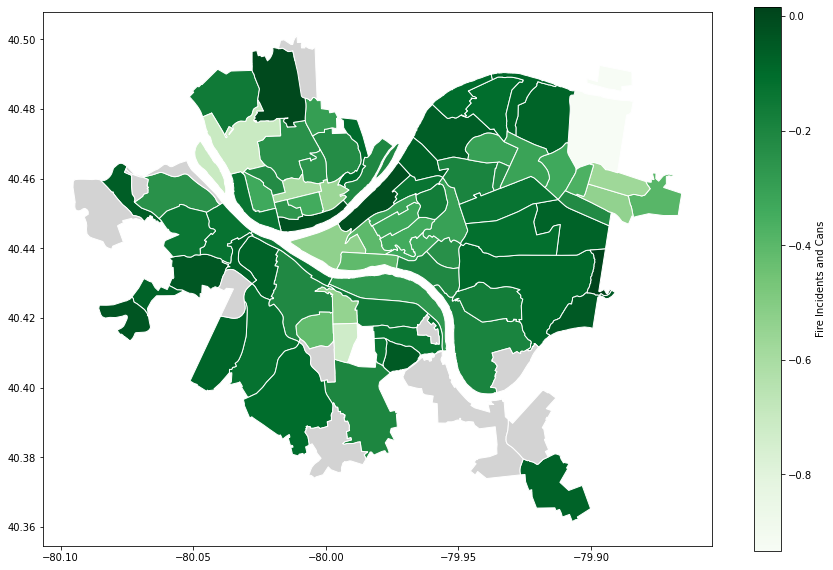

In [16]:
#chloropleth map for one merge
# this is to make sure merges work correctly before the final merge is done with Beautify
combo1_geo.plot(column='ratio', # setting the ratio column to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Incidents and Cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

According to just the fire incidetns and smart trash can combined metric, Regent Square is the best neighborhood with the highest ratio and Lincoln-Lemington-Belmar is the worst neighborhood with the lowest ratio.

## Fire Incidents, Smart Trash Cans, Beautify The Burgh - Combined Metric

### Merging the combined dataset of fire incidents and smart trash cans with the beautify ratio

In [26]:
# merging with third dataset (beautify the burgh)

# merging the fire incidents and smart trash can data set with beautify to create new dataframe
y = rt.merge(beautify, how = "left", left_on = "hood", right_on ="hood", suffixes=("ratio","realratio"))
# setting any NaN or inf values to equal 0, so it doesn't affect further steps and makes the table look nicer
y = y.replace([np.inf, -np.inf, np.NaN], 0)
# setting a new column called total ratio equal to the added ratios to get a combined quantitive ratio
y["totalratio"] = y["ratio"] + y["ratios"]
# printing out the first 30 rows in the dataframe
y.head(30)

,hood,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio,Beautified Area Sq Meters,acres,Beautified Area Acres,ratios,totalratio
0,North Shore,52,195.014,0.266648,56,195.014,0.287159,-0.020511,0.000000,0.000,0.000000,0.000000,-0.020511
1,Central Oakland,39,180.883,0.215609,83,180.883,0.458860,-0.243251,203957.834701,180.883,50.399034,0.278628,0.035377
2,East Liberty,68,373.650,0.181988,185,373.650,0.495116,-0.313127,31317.548923,373.650,7.738728,0.020711,-0.292416
3,Friendship,12,68.297,0.175703,28,68.297,0.409974,-0.234271,0.000000,0.000,0.000000,0.000000,-0.234271
4,East Allegheny,26,151.705,0.171385,111,151.705,0.731683,-0.560298,0.000000,0.000,0.000000,0.000000,-0.560298
5,Allegheny West,14,90.841,0.154115,38,90.841,0.418313,-0.264198,19151.980159,90.841,4.732553,0.052097,-0.212101
6,Bluff,32,210.510,0.152012,119,210.510,0.565294,-0.413282,0.000000,0.000,0.000000,0.000000,-0.413282
7,Middle Hill,29,196.108,0.147878,94,196.108,0.479328,-0.331450,0.000000,0.000,0.000000,0.000000,-0.331450
8,Crawford-Roberts,22,166.101,0.132450,89,166.101,0.535819,-0.403369,0.000000,0.000,0.000000,0.000000,-0.403369
9,Bloomfield,59,451.405,0.130703,146,451.405,0.323435,-0.192732,0.000000,0.000,0.000000,0.000000,-0.192732


### Grouping just neighborhood and the total ratio together 

In [28]:
#groups just neighborhood and total ratio

# setting new dataframe equal to the combined one with only hood and total ratio columns
c = y[["hood", "totalratio"]]
# sorting that dataframe by the totalratio from 
c.sort_values("totalratio", ascending = False)

,hood,totalratio
34,Mount Washington,0.135872
12,Lower Lawrenceville,0.113046
13,Strip District,0.087841
1,Central Oakland,0.035377
17,Regent Square,0.016171
...,...,...
43,Homewood North,-0.569607
24,Central Northside,-0.600691
14,Marshall-Shadeland,-0.701712
36,Knoxville,-0.726872


## Merging with shape file to get chloropleth map

In [31]:
# creating variable to read shape file and then merging it with c
neigh = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# merging the shape file with the table with hood and combined ratios
combined = neigh.merge(c, how='left', left_on='hood', right_on='hood')
# printing the head to confirm it merged correctly
combined.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,totalratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0.035377
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",-0.163134
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",-0.188598
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",-0.403369
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0.087841


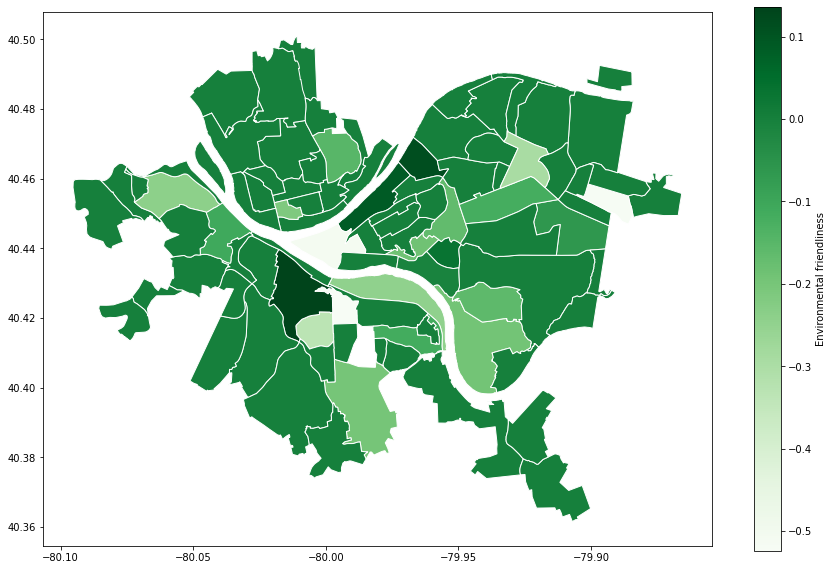

In [27]:
#plotting chloropleth map
combined.plot(column='totalratio', # set the column to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Environmental friendliness"}, # label the legend
               figsize=(15, 10),         # set the size # set disctricts with no data to gray
               )

Combined conclusion:
Our combined metric was using the three ratios: fire incidents/acreage of neighborhood, smart trash cans/acreage of neighborhood, and beautified area(in acres)/acreage of neighborhood. Since both beautified area ratio and smart trash can ratio follow the rule that the greater the ratio, the better, those two were added together. Then, we subtracted the fire incidents ratio because the inverse is true(the higher the ratio, the worse). All of the ratios were less than 1, so the magnitude of 1 was not greater than another. Therefore, we did not have to do any data normalization calculations to any of our datasets.

Overall, according to our data, Mount Washington is the best neighborhood and Lincoln-Lemington-Belmar is the worst neighborhood, according to our combined metric, because Mount Washington had the highest ratio when the three ratios were taken into consideration while Lincoln-Lemington-Belmar had the lowest ratio.

Conclusion Paragraphs:
<br/>
Ruchi: 
According to my personal notebook, the neighborhood with the largest ratio of trash cans to area is North Shore and the one with the least is Banksville. That is different from what the total ratio in the combined notebook tells us, however. That is because of the difference in the metric of my personal notebook and the combined noteboook. Overall, the metric of my personal one was only based off of one dataset so it did not take into consideration the other two datasets that we used in the combined. My personal metric was the number of trash cans per acre to get which neighborhood had the most trash cans per acre of area. My metric was the higher the value the better which is why the neighborhood with the largest ratio is the best and why the one with the lowest is the worst. 

Dailynn:
According to my notebook, the neighborhood with the largest area cleaned to area ratio is Mount Washington and the least is Hazelwood. Since my metrics are different from my other group members, my conclusions are different from their notebooks. My metric used my chosen dataset to find out which neighborhood was the cleanest by completing a calculation utilizing the area of the cleaning and dividing it by the total area of the neighborhood. Through that calculation, I was able to create the ratio and compare the neighborhoods. Additionally, my dataset did not contain as many neighborhoods because certain areas had more access to more volunteers available for clean-up. Thus, certain areas are more cared about by the overall population of Pittsburgh than others. However, each data row is significant because it represents which cleanup crews were assigned to which neighborhood and how much each crew specifically cleaned up.

Le Lin: 
The fire-incidents in pittsburgh contains all the fire-cases of different neighborhoods in pittsburgh. The fire incidents effect the air quality and air pollution. The places where less fire incidents will have better air quality. So the fire-incidents dataset is also related to the environmental friendness. Base on my individual metric, I use the ratio acres/frequency, so where the ratio is higher, the less fire incidents happened. In contrast if using the ratio of frequency/acre, the neighborhood that has lowest ratio will be the best.

Note: All three of our datasets required the use of the Neighborhoods dataset because depending on the area of the neighborhood it could have more or less fires, smart trash cans, and area cleaned. 